# Works on TF but not on keras, made some changes to run on tf v.1.0.
# Consider using Lambda layer (whatever that is)

In [9]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np


def _phase_shift(I, r):
    bsize, a, b, c = I.get_shape().as_list()
    bsize = tf.shape(I)[0] # Handling Dimension(None) type for undefined batch dim
    X = tf.reshape(I, (bsize, a, b, r, r))
    X = tf.transpose(X, (0, 1, 2, 4, 3))  # bsize, a, b, 1, 1
    #X = tf.split(1, a, X)  # a, [bsize, b, r, r]
    X = tf.split(X, a, 1)
    X = tf.concat( [tf.squeeze(x) for x in X], 2)  # bsize, b, a*r, r
    #X = tf.split(1, b, X)  # b, [bsize, a*r, r]
    X = tf.split(X, b, 1)
    X = tf.concat( [tf.squeeze(x) for x in X], 2)  # bsize, a*r, b*r
    return tf.reshape(X, (bsize, a*r, b*r, 1))


def PS(X, r, color=False):
    if color:
        Xc = tf.split(X, 3, 3)
        X = tf.concat( [_phase_shift(x, r) for x in Xc],3)
    else:
        X = _phase_shift(X, r)
    return X



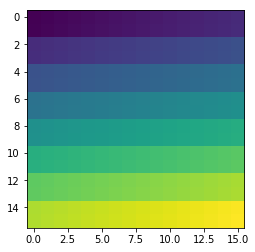

In [10]:
if __name__ == "__main__":
    with tf.Session() as sess:
        x = np.arange(2*16*16).reshape(2, 8, 8, 4)
        X = tf.placeholder("float32", shape=(2, 8, 8, 4), name="X")# tf.Variable(x, name="X")
        Y = PS(X, 2)
        y = sess.run(Y, feed_dict={X: x})

        x2 = np.arange(2*3*16*16).reshape(2, 8, 8, 4*3)
        X2 = tf.placeholder("float32", shape=(2, 8, 8, 4*3), name="X")# tf.Variable(x, name="X")
        Y2 = PS(X2, 2, color=True)
        y2 = sess.run(Y2, feed_dict={X2: x2})
        #print y2.shape
    plt.imshow(y[0, :, :, 0], interpolation="none")
    plt.show()